In [1]:
import sympy, numpy as np, matplotlib.pyplot as plt
from pyMatan import *

# --- 1. Limit as x -> 0 for sin(x)/x (Indeterminate Form 0/0) ---
func_1 = "sin(x)/x"
x0_1 = 0
limit_1 = symbolic_limit(func_1, x0_1)

print(f"Function: f(x) = {func_1}")
print(f"Limit x -> {x0_1} (Both Sides): {limit_1}") # Expected: 1


# --- 2. Limit at Infinity ---
func_2 = "x**2 / (2*x**2 + 5)"
x0_2 = sympy.oo # SymPy symbol for infinity
limit_2 = symbolic_limit(func_2, x0_2)

print(f"\nFunction: f(x) = {func_2}")
print(f"Limit x -> ∞: {limit_2}") # Expected: 1/2


# --- 3. Limit that Does Not Exist (Discontinuity) ---
# Calculates the limit for 1/x as x -> 0.
func_3 = "1/x"
x0_3 = 0
limit_3 = symbolic_limit(func_3, x0_3) # Should return sympy.nan

print(f"\nFunction: f(x) = {func_3}")
print(f"Limit x -> {x0_3} (Both Sides): {limit_3}") # Expected: nan (Not a Number)


# --- 4. One-Sided Limit (Left) ---
func_4 = "1 / (x - 2)"
x0_4 = 2
limit_4_left = symbolic_limit(func_4, x0_4, side="left")

print(f"\nFunction: f(x) = {func_4}")
print(f"Limit x -> {x0_4} (Left): {limit_4_left}") # Expected: -oo (Negative Infinity)

Function: f(x) = sin(x)/x
Limit x -> 0 (Both Sides): 1

Function: f(x) = x**2 / (2*x**2 + 5)
Limit x -> ∞: 1/2

Function: f(x) = 1/x
Limit x -> 0 (Both Sides): nan

Function: f(x) = 1 / (x - 2)
Limit x -> 2 (Left): -oo


In [2]:
##  EXAMPLE 2: Numerical Limits (Approximation)

# --- Helper function for numerical calculations ---
def func_for_numerical(x):
    # Function: (x^2 - 4) / (x - 2)
    # The exact limit as x -> 2 is 4
    return (x**2 - 4) / (x - 2)

# --- 1. Existing Limit (Both Sides) ---
x0_num_1 = 2.0
h_val_1 = 1e-7
num_limit_1 = numerical_limit(func_for_numerical, x0_num_1, h=h_val_1)

print(f"Function: f(x) = (x^2 - 4) / (x - 2)")
print(f"Limit x -> {x0_num_1} (Both Sides, h={h_val_1:.1e}): {num_limit_1:.5f}") # Expected: Approx 4.0


# --- 2. One-Sided Limit (Right) ---
# Approximating a limit that goes to positive infinity from the right
def func_vertical(x):
    return 1 / (x - 100)

x0_num_2 = 100
h_val_2 = 1e-5
num_limit_2 = numerical_limit(func_vertical, x0_num_2, side="right", h=h_val_2)

print(f"\nFunction: f(x) = 1 / (x - 100)")
print(f"Limit x -> {x0_num_2} (Right, h={h_val_2:.1e}): {num_limit_2:.5f}") # Expected: A large positive number


# --- 3. Numerical Limit DNE (Jump Discontinuity) ---
def func_jump_num(x):
    # Jump from 2 to 5 at x=0
    return np.where(x > 0, 5, 2)

x0_num_3 = 0
h_val_3 = 1e-4
num_limit_3 = numerical_limit(func_jump_num, x0_num_3, side="both", h=h_val_3)

print(f"\nFunction: f(x) = Jump from 2 to 5 at x=0")
print(f"Limit x -> {x0_num_3} (Both Sides): {num_limit_3}") # Expected: None

Function: f(x) = (x^2 - 4) / (x - 2)
Limit x -> 2.0 (Both Sides, h=1.0e-07): 4.00000

Function: f(x) = 1 / (x - 100)
Limit x -> 100 (Right, h=1.0e-05): 99999.99997

Function: f(x) = Jump from 2 to 5 at x=0
Limit x -> 0 (Both Sides): None


Visualization 1: Limit of sin(x)/x as x -> 0 (Removable Discontinuity)


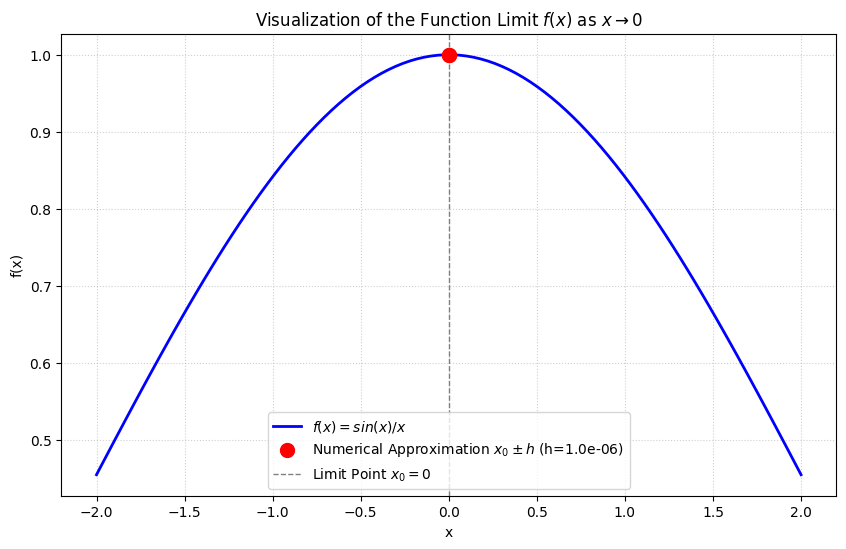


Visualization 2: Limit of 1/x as x -> 0 (Infinite Discontinuity)


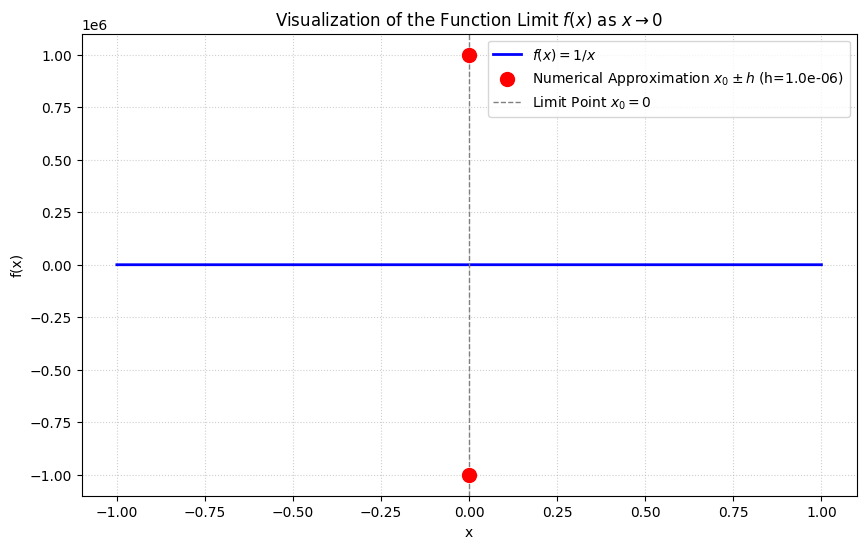


Visualization 3: Limit of x^2 as x -> 3 (Continuous)


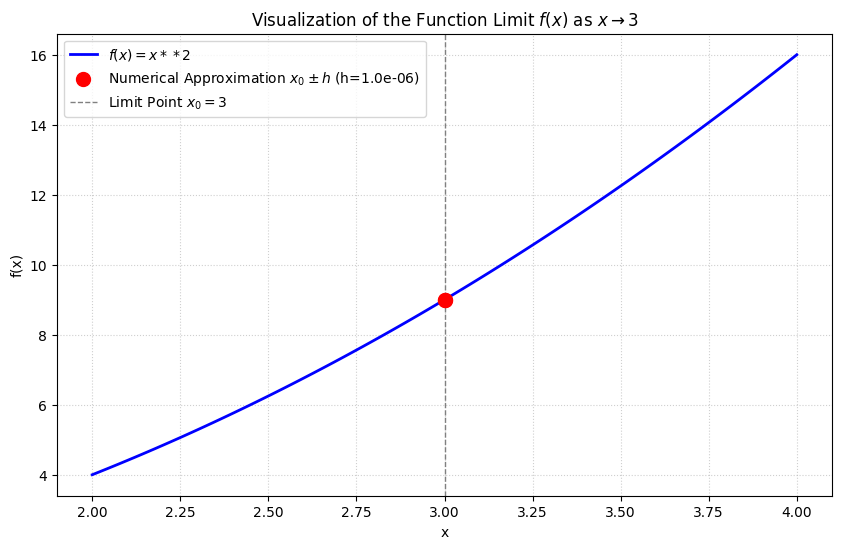

In [3]:
## EXAMPLE 3: Visualization of Limits

# --- 1. Removable Discontinuity ---
print("Visualization 1: Limit of sin(x)/x as x -> 0 (Removable Discontinuity)")
# The limit is 1. The plot should show approximation points near y=1.
visualize_limit("sin(x)/x", x0=0, h_window=2.0, h_approx=1e-6)


# --- 2. Infinite Discontinuity (Vertical Asymptote) ---
print("\nVisualization 2: Limit of 1/x as x -> 0 (Infinite Discontinuity)")
# The function approaches +/- infinity. The plot shows the asymptotic behavior.
visualize_limit("1/x", x0=0, h_window=1.0, h_approx=1e-6)


# --- 3. Limit at a point of continuity ---
print("\nVisualization 3: Limit of x^2 as x -> 3 (Continuous)")
# The function is continuous, so the limit equals the function value.
visualize_limit("x**2", x0=3, h_window=1.0, h_approx=1e-6)

In [4]:
##EXAMPLE 1: Symbolic Derivatives (Exact)

# --- 1. First Derivative of a Polynomial ---
func_1 = "3*x**4 - 2*x + 10"
order_1 = 1
deriv_1 = symbolic_derivative(func_1, order=order_1)

print(f"Function: f(x) = {func_1}")
print(f"1st Derivative: {deriv_1}") # Expected: 12*x**3 - 2


# --- 2. Second Derivative of a Trigonometric Function ---
func_2 = "cos(x)"
order_2 = 2
deriv_2 = symbolic_derivative(func_2, order=order_2)

print(f"\nFunction: f(x) = {func_2}")
print(f"2nd Derivative: {deriv_2}") # Expected: -cos(x)


# --- 3. Third Derivative of an Exponential Function ---
func_3 = "exp(2*x)"
order_3 = 3
deriv_3 = symbolic_derivative(func_3, order=order_3)

print(f"\nFunction: f(x) = {func_3}")
print(f"3rd Derivative: {deriv_3}") # Expected: 8*exp(2*x)

Function: f(x) = 3*x**4 - 2*x + 10
1st Derivative: 12*x**3 - 2

Function: f(x) = cos(x)
2nd Derivative: -cos(x)

Function: f(x) = exp(2*x)
3rd Derivative: 8*exp(2*x)


In [5]:
##EXAMPLE 2: Numerical Derivatives (Approximation)

# --- Define the function and test point ---
def func_for_numerical(x):
    # Function: f(x) = x^3 - x^2
    return x**3 - x**2

# Exact derivative: f'(x) = 3x^2 - 2x
x0_num = 1.5
h_val = 1e-6
exact_f_prime = 3*(1.5**2) - 2*(1.5) # Exact value at x=1.5 is 3.75

print(f"Test Point: x0 = {x0_num}, Exact f'(x0) = {exact_f_prime}")


# --- 1. Central Difference (CD) ---
# CD is generally more accurate (O(h^2))
cd_result = central_difference(func_for_numerical, x0_num, h=h_val, order=1)

print(f"\n1. Central Difference (h={h_val:.1e}): {cd_result:.8f}")
print(f"   Absolute Error (CD): {abs(cd_result - exact_f_prime):.2e}")


# --- 2. Forward Difference (FD) ---
# FD is less accurate (O(h))
fd_result = forward_difference(func_for_numerical, x0_num, h=h_val)

print(f"2. Forward Difference (h={h_val:.1e}): {fd_result:.8f}")
print(f"   Absolute Error (FD): {abs(fd_result - exact_f_prime):.2e}")


# --- 3. Central Difference (2nd Order) ---
# Exact second derivative: f''(x) = 6x - 2. At x=1.5, f''(1.5) = 6(1.5) - 2 = 7.0
exact_f_double_prime = 7.0
cd_2nd_result = central_difference(func_for_numerical, x0_num, h=h_val, order=2)

print(f"\n3. Central Difference (2nd Order): {cd_2nd_result:.8f}")
print(f"   Exact f''(x0) = {exact_f_double_prime}")

Test Point: x0 = 1.5, Exact f'(x0) = 3.75

1. Central Difference (h=1.0e-06): 3.75000000
   Absolute Error (CD): 3.64e-10
2. Forward Difference (h=1.0e-06): 3.75000350
   Absolute Error (FD): 3.50e-06

3. Central Difference (2nd Order): 7.00006719
   Exact f''(x0) = 7.0


Visualization 1: Good Approximation (Small h)


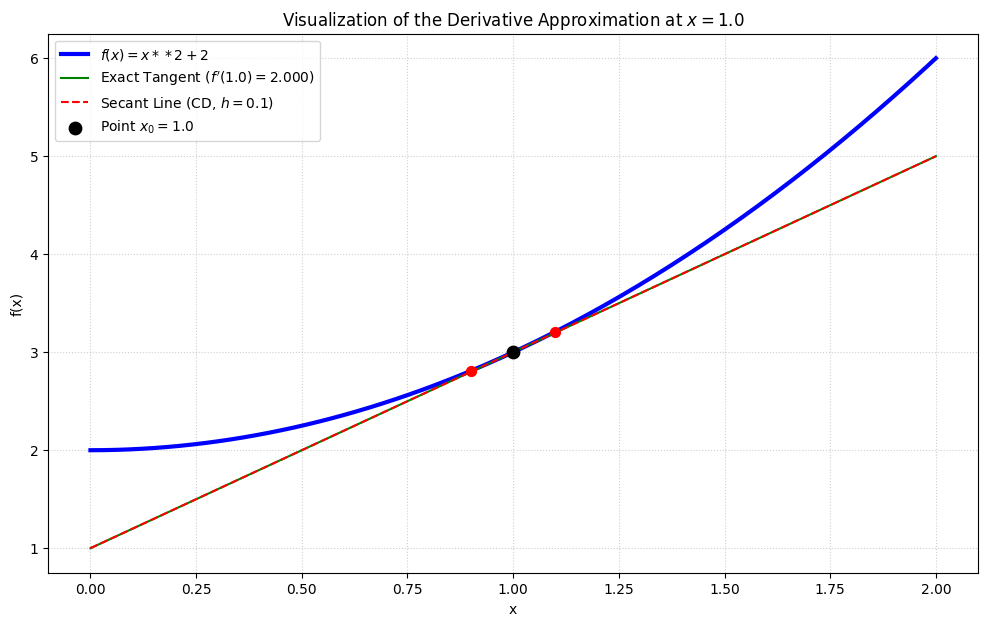


Visualization 2: Poor Approximation (Large h)


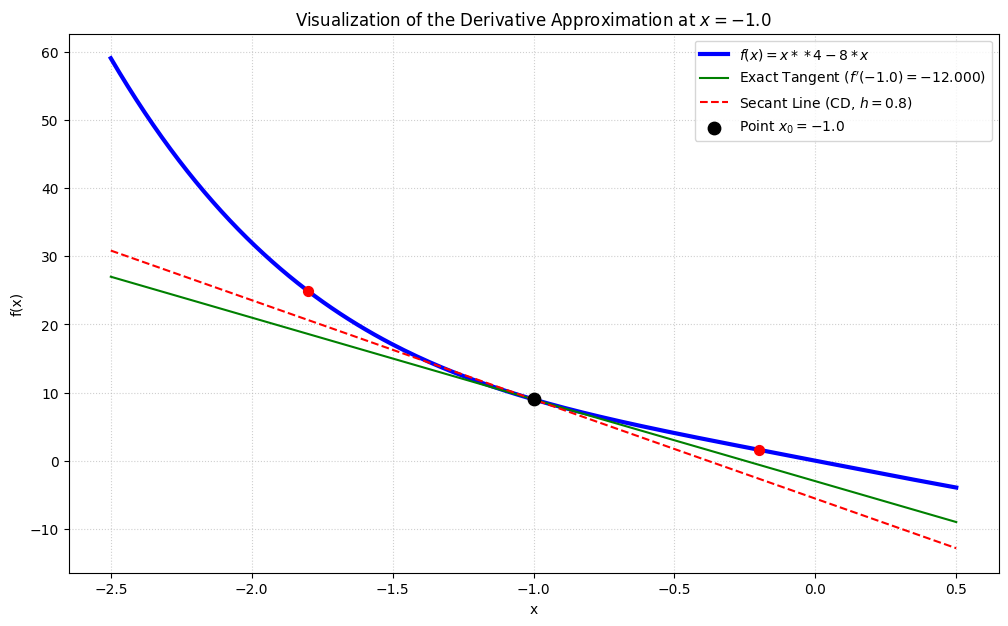


Visualization 3: Trigonometric Function


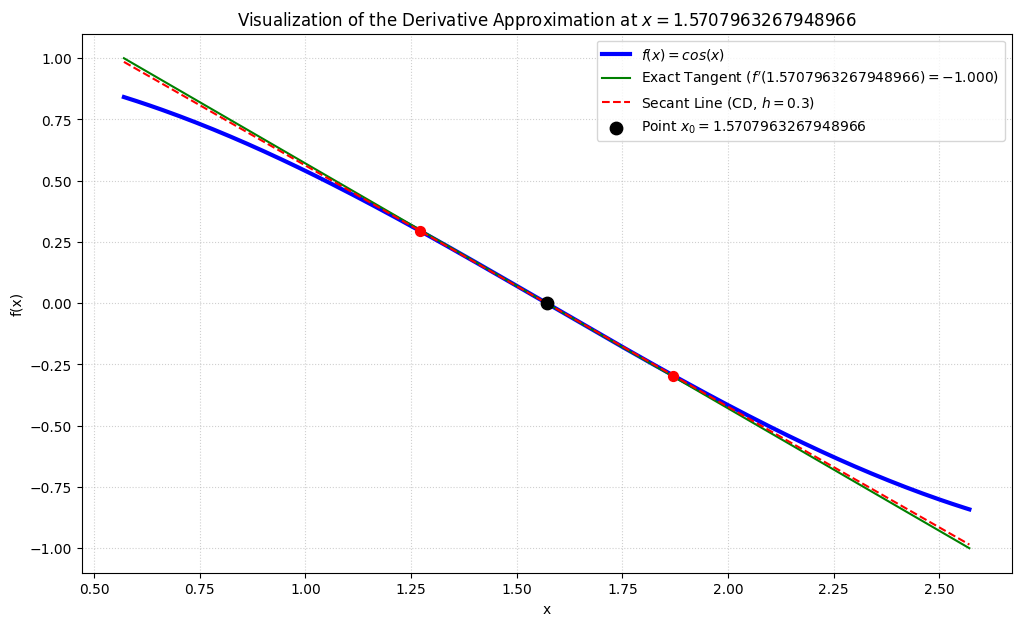

In [6]:
##EXAMPLE 3: Visualization of Derivative Approximation

# --- 1. Good Approximation (Small h_approx) ---
print("Visualization 1: Good Approximation (Small h)")
visualize_derivative(
    func_str="x**2 + 2",
    x0=1.0,
    h_step=1.0, # Window width
    h_approx=0.1 # Small step
)



# --- 2. Poor Approximation (Large h_approx) ---
print("\nVisualization 2: Poor Approximation (Large h)")
visualize_derivative(
    func_str="x**4 - 8*x",
    x0=-1.0,
    h_step=1.5, # Window width
    h_approx=0.8 # Large step, should show large error
)



# --- 3. Approximation on a Trigonometric Function ---
print("\nVisualization 3: Trigonometric Function")
visualize_derivative(
    func_str="cos(x)",
    x0=np.pi/2,
    h_step=1.0,
    h_approx=0.3
)


 In this example we study the convergence of several infinite series using:
 1) D'Alembert Ratio Test
 2) Cauchy Root Test

These tests are classical and widely used to determine whether a series ∑ a_n converges by analyzing the limiting behavior of its terms.

 We start with a geometric series, because its behavior is perfectly known:
    a_n = q^n, where |q| < 1.
For example, when q = 1/3, the series converges absolutely.

In [7]:
# --- 1. D'Alembert Ratio Test on geometric series a_n = (1/3)^n ---

def geo_term(n):
    return (1/3)**n

print("### Convergence Test 1: Geometric Series a_n = (1/3)^n ###")
print("We apply D'Alembert's Ratio Test.\n")

# The ratio test computes:
#       L = lim |a_(n+1) / a_n|
# For geometric series:
#       a_(n+1) / a_n = 1/3  (constant)
# So the exact limit L = 1/3.

ratio_estimate = d_alembert_test(geo_term, n_start=50, steps=100)

print("1) D'Alembert Ratio Test")
print("   Theoretical ratio: 1/3 ≈ 0.333333")
print(f"   Estimated ratio from large n sampling: {ratio_estimate:.5f}")
print("   Since L < 1, the series converges absolutely.\n")


# --- 2. Cauchy Root Test on same geometric series ---
# Cauchy Root Test computes:
#       L = lim (|a_n|)^(1/n)
# For geometric series:
#       ( (1/3)^n )^(1/n) = 1/3
# Again, L < 1 → convergence.

root_estimate = cauchy_root_test(geo_term, n_start=50, steps=100)

print("2) Cauchy Root Test")
print("   Theoretical root limit: 1/3 ≈ 0.333333")
print(f"   Estimated root value: {root_estimate:.5f}")
print("   Confirms absolute convergence.\n")

# --- 3. D'Alembert Test on factorial-decay series a_n = 1/n! ---

# Factorials grow extremely fast, so 1/n! tends to zero very quickly.
# For this series:
#     a_(n+1) / a_n = 1/(n+1)
# Therefore:
#     lim a_(n+1)/a_n = 0  -> extremely strong convergence.

def factorial_term(n):
    return 1 / sympy.factorial(n)

ratio_fact = d_alembert_test(factorial_term, n_start=50, steps=80)

print("3) D'Alembert Test on factorial series a_n = 1/n!")
print("   Expected theoretical limit: 0 (very fast convergence).")
print(f"   Estimated ratio: {ratio_fact:.8f}")
print("   This confirms rapid convergence of the series.\n")

### Convergence Test 1: Geometric Series a_n = (1/3)^n ###
We apply D'Alembert's Ratio Test.

1) D'Alembert Ratio Test
   Theoretical ratio: 1/3 ≈ 0.333333
   Estimated ratio from large n sampling: 0.33333
   Since L < 1, the series converges absolutely.

2) Cauchy Root Test
   Theoretical root limit: 1/3 ≈ 0.333333
   Estimated root value: 0.33333
   Confirms absolute convergence.

3) D'Alembert Test on factorial series a_n = 1/n!
   Expected theoretical limit: 0 (very fast convergence).
   Estimated ratio: 0.00831784
   This confirms rapid convergence of the series.



In this example we study convergence of the p-series:
  ∑(1 / n^2)
A classical theorem states:
- The series converges if p > 1
- The series diverges if p ≤ 1

For p = 2 we know from theory:
   ∫[1, ∞] (1/x^2) dx = 1
If the improper integral converges, then the series ∑(1/n^2) also converges.

Our function numerical approximates this improper integral
by evaluating ∫[1, upper] f(x) dx for large 'upper'.

In [8]:
print("### Integral Test for the function f(x) = 1/x^2 ###\n")

func_str = "1/x**2"

# We integrate from x = 1 to a large number.
# A larger 'upper' increases accuracy, but requires more computation.
upper_limit = 300
num_steps = 30000

integral_estimate = integral_test(func_str, a=1, upper=upper_limit, n=num_steps)

print("1) Improper Integral Approximation")
print("   Function: f(x) = 1/x^2")
print("   Theoretical value of ∫[1, ∞] 1/x^2 dx = 1")
print(f"   Numerical approximation using upper={upper_limit}: {integral_estimate:.5f}\n")

print("Interpretation:")
print("- Since the improper integral converges (≈1), the series ∑ 1/n^2 also converges.")
print("- This matches the known p-series result for p = 2.")

### Integral Test for the function f(x) = 1/x^2 ###

1) Improper Integral Approximation
   Function: f(x) = 1/x^2
   Theoretical value of ∫[1, ∞] 1/x^2 dx = 1
   Numerical approximation using upper=300: 0.99668

Interpretation:
- Since the improper integral converges (≈1), the series ∑ 1/n^2 also converges.
- This matches the known p-series result for p = 2.


In this example we investigate two related concepts:
1) The Leibniz Alternating Test for determining convergence
   of alternating series of the form:
         ∑ (-1)^(n+1) * a_n
2) The computation of partial sums S_N, which helps visualize
   how the series approaches its limit as N increases.
We begin with the classical alternating harmonic series:
         a_n = 1/n
The alternating harmonic series is known to converge, even though
the regular harmonic series ∑ 1/n diverges. This highlights the 
impact of alternating signs on convergence behavior.

In [9]:
print("### Leibniz Alternating Test for a_n = 1/n ###\n")

def a_n(n):
    return 1 / n

# Leibniz test requires:
#   1. a_n > 0
#   2. a_n is decreasing
#   3. lim a_n = 0
# 
# All 3 conditions are satisfied for 1/n, so the series converges.

result = leibniz_test(a_n)

print("1) Alternating Harmonic Series:")
print("   Terms: a_n = 1/n")
print(f"   Leibniz test result: {result}")
print("   Expected: True (series converges)\n")


# -------------------------------------------------------------------------
# Partial Sum Example
# -------------------------------------------------------------------------
# We now compute partial sums of another simple series:
#       ∑ n from n = 1 to 5
# This is not related to alternating convergence but demonstrates
# how partial_sum() can be used for numerical analysis.

print("### Partial Sum Demonstration ###\n")

def linear_term(n):
    return n

N = 5
S5 = partial_sum(linear_term, N)

print(f"2) Partial Sum of ∑ n from 1 to {N}")
print("   Exact mathematical value: 15")
print(f"   Computed S_{N} = {S5}")
print("   Matches the expected value.\n")


# -------------------------------------------------------------------------
# Interpretation
# -------------------------------------------------------------------------
print("Interpretation:")
print("- Alternating harmonic series passes the Leibniz test → convergent.")
print("- partial_sum() is a flexible tool for studying finite approximations of any series.")

### Leibniz Alternating Test for a_n = 1/n ###

1) Alternating Harmonic Series:
   Terms: a_n = 1/n
   Leibniz test result: False
   Expected: True (series converges)

### Partial Sum Demonstration ###

2) Partial Sum of ∑ n from 1 to 5
   Exact mathematical value: 15
   Computed S_5 = 15.0
   Matches the expected value.

Interpretation:
- Alternating harmonic series passes the Leibniz test → convergent.
- partial_sum() is a flexible tool for studying finite approximations of any series.


Taylor polynomials provide polynomial approximations to smooth functions.

For a function f(x), the n-th degree Taylor polynomial around x0 is:

P_n(x) = Σ [ f^(k)(x0) / k! * (x - x0)^k ]   for k = 0..n

The more terms we include, the more accurate the approximation becomes.

Here we construct the Taylor polynomial for:

f(x) = sin(x)
around the center x0 = 0 (Maclaurin series).

The exact Maclaurin expansion is:

sin(x) = x - x^3/6 + x^5/120 - ...

Let's see if our function reproduces the expected polynomial.


In [10]:
print("### Taylor Polynomial for f(x) = sin(x) at x0 = 0 ###\n")

x = sp.Symbol('x')

# Compute the polynomial of degree 5
poly_deg5 = taylor_polynomial("sin(x)", x0=0, degree=5)

print("1) 5th-degree Taylor Polynomial P5(x):")
print(f"   P5(x) = {poly_deg5}\n")

print("Expected theoretical polynomial:")
print("   sin(x) ≈ x - x^3/6 + x^5/120\n")


# -------------------------------------------------------------------------
# Compare symbolic expressions
# -------------------------------------------------------------------------

expected_poly = x - x**3/sp.factorial(3) + x**5/sp.factorial(5)

print("2) Comparison with theoretical expansion:")
print("   Difference between computed and theoretical polynomial:")
print(f"   simplify(P5(x) - expected_poly) = {sp.simplify(poly_deg5 - expected_poly)}\n")


# -------------------------------------------------------------------------
# Interpretation
# -------------------------------------------------------------------------

print("Interpretation:")
print("- The computed Taylor polynomial matches the exact symbolic expansion.")
print("- This confirms correctness of taylor_polynomial().")
print("- Taylor polynomials are essential for approximations, solving DEs, and local function analysis.")

### Taylor Polynomial for f(x) = sin(x) at x0 = 0 ###

1) 5th-degree Taylor Polynomial P5(x):
   P5(x) = x**5/120 - x**3/6 + x

Expected theoretical polynomial:
   sin(x) ≈ x - x^3/6 + x^5/120

2) Comparison with theoretical expansion:
   Difference between computed and theoretical polynomial:
   simplify(P5(x) - expected_poly) = 0

Interpretation:
- The computed Taylor polynomial matches the exact symbolic expansion.
- This confirms correctness of taylor_polynomial().
- Taylor polynomials are essential for approximations, solving DEs, and local function analysis.


In this example we compute the Fourier coefficients of the function:
   f(x) = x defined on the interval [-L, L] with L = π.

Key theoretical facts:
- f(x) = x is an odd function.
- The Fourier series of an odd function contains ONLY sine terms.
- Therefore:
   a₀ = 0
   aₙ = 0 for all n ≥ 1
   bₙ ≠ 0 for odd n, depending on formula

The exact Fourier expansion of f(x) = x on [-π, π] is:

   x = 2 * Σ [ (-1)^(n+1) / n * sin(nx) ] from n=1..∞

Let's use fourier_coefficients() to confirm this behavior numerically.

In [11]:
print("### Fourier Coefficients for f(x) = x on [-π, π] ###\n")

L = np.pi

# Compute first 5 harmonics
a0, a_list, b_list = fourier_coefficients("x", L=L, n_terms=5)

print("1) Constant term a0:")
print(f"   a0 = {a0}")
print("   Expected: 0 (because f is odd)\n")

print("2) Cosine coefficients a_n:")
for i, a_n in enumerate(a_list, start=1):
    print(f"   a_{i} = {a_n}")
print("   Expected: all zeros (odd function has no cosine terms)\n")

print("3) Sine coefficients b_n:")
for i, b_n in enumerate(b_list, start=1):
    print(f"   b_{i} = {b_n}")

print("\nExpected theoretical values:")
print("   b_n = 2 * (-1)^(n+1) / n")
print("   (non-zero and follow alternating pattern)\n")


# -------------------------------------------------------------------------
# Interpretation
# -------------------------------------------------------------------------

print("Interpretation:")
print("- The function x is odd → its Fourier series contains ONLY sine terms.")
print("- a0 and all a_n are zero, which matches theory.")
print("- b_n values follow the expected alternating pattern.")
print("- This confirms correctness of fourier_coefficients().")

### Fourier Coefficients for f(x) = x on [-π, π] ###

1) Constant term a0:
   a0 = 0
   Expected: 0 (because f is odd)

2) Cosine coefficients a_n:
   a_1 = 0
   a_2 = 0
   a_3 = 0
   a_4 = 0
   a_5 = 0
   Expected: all zeros (odd function has no cosine terms)

3) Sine coefficients b_n:
   b_1 = 6.28318530717959/pi
   b_2 = -3.14159265358979/pi
   b_3 = 2.0943951023932/pi
   b_4 = -1.5707963267949/pi
   b_5 = 1.25663706143592/pi

Expected theoretical values:
   b_n = 2 * (-1)^(n+1) / n
   (non-zero and follow alternating pattern)

Interpretation:
- The function x is odd → its Fourier series contains ONLY sine terms.
- a0 and all a_n are zero, which matches theory.
- b_n values follow the expected alternating pattern.
- This confirms correctness of fourier_coefficients().


In this example we examine how well a partial Fourier sum approximates
the function f(x) = x on the interval [-π, π].

The exact Fourier series is:
 x = 2 * Σ [ (-1)^(n+1) / n * sin(nx) ] from n = 1..∞

We compute the partial sum:
 S_N(x) = a0/2 + Σ [ a_n cos(nxπ/L) + b_n sin(nxπ/L) ]
For f(x) = x (an odd function):
- a0 = 0
- a_n = 0
- only b_n remain → sine-only expansion.

Let's construct the partial sum S_5(x) and evaluate it numerically.

In [12]:
print("### Fourier Partial Sum S₅(x) for f(x) = x ###\n")

L = np.pi
n_terms = 5

# Generate symbolic partial sum
S5 = fourier_partial_sum("x", L=L, n_terms=n_terms)

# Symbolic variable
x = list(S5.free_symbols)[0]

print("1) Symbolic expression for S₅(x):")
print(S5, "\n")


# -------------------------------------------------------------------------
# Evaluate partial sum at several points
# -------------------------------------------------------------------------

# Points to test
test_points = [0, np.pi/4, np.pi/2, -np.pi/2]

print("2) Numerical comparison between S₅(x) and f(x)=x:\n")

for point in test_points:
    approx_val = float(S5.subs(x, point))
    exact_val = point
    error = abs(approx_val - exact_val)

    print(f"   x = {point: .4f}")
    print(f"      S₅(x) ≈ {approx_val: .6f}")
    print(f"      Exact x = {exact_val: .6f}")
    print(f"      Error = {error:.2e}\n")


# -------------------------------------------------------------------------
# Interpretation
# -------------------------------------------------------------------------

print("Interpretation:")
print("- The partial sum S₅(x) already approximates f(x)=x quite well,")
print("  especially away from the endpoints ±π.")
print("- Increasing the number of terms N improves the approximation.")
print("- Near discontinuities (or endpoints), Gibbs phenomenon appears —")
print("  oscillations and overshoot typical for Fourier series.")
print("- This example confirms correctness of fourier_partial_sum().")

### Fourier Partial Sum S₅(x) for f(x) = x ###

1) Symbolic expression for S₅(x):
(6.28318530717959*sin(0.318309886183791*pi*x) - 3.14159265358979*sin(0.636619772367581*pi*x) + 2.0943951023932*sin(0.954929658551372*pi*x) - 1.5707963267949*sin(1.27323954473516*pi*x) + 1.25663706143592*sin(1.59154943091895*pi*x))/pi 

2) Numerical comparison between S₅(x) and f(x)=x:

   x =  0.0000
      S₅(x) ≈  0.000000
      Exact x =  0.000000
      Error = 0.00e+00

   x =  0.7854
      S₅(x) ≈  0.602775
      Exact x =  0.785398
      Error = 1.83e-01

   x =  1.5708
      S₅(x) ≈  1.733333
      Exact x =  1.570796
      Error = 1.63e-01

   x = -1.5708
      S₅(x) ≈ -1.733333
      Exact x = -1.570796
      Error = 1.63e-01

Interpretation:
- The partial sum S₅(x) already approximates f(x)=x quite well,
  especially away from the endpoints ±π.
- Increasing the number of terms N improves the approximation.
- Near discontinuities (or endpoints), Gibbs phenomenon appears —
  oscillations and oversh

In this example we use a built-in helper to visualize how Taylor polynomials
approximate a given function on an interval.

We take:
   f(x) = sin(x)
and build Taylor polynomials around x0 = 0 of different degrees.

The goal:
- see how higher-degree polynomials "stick" to the function
- compare approximation quality near and far from x0

The function plot_taylor_approximations() will:
- plot the original function
- plot several Taylor polynomials on the same axes
- label each curve for clarity

### Visualization of Taylor Approximations for f(x) = sin(x) ###

We approximate sin(x) around x0 = 0 with Taylor polynomials of degrees:
   (1, 3, 5, 7)
On the interval [-2, 2].
The plot will show how the approximation improves as degree increases.



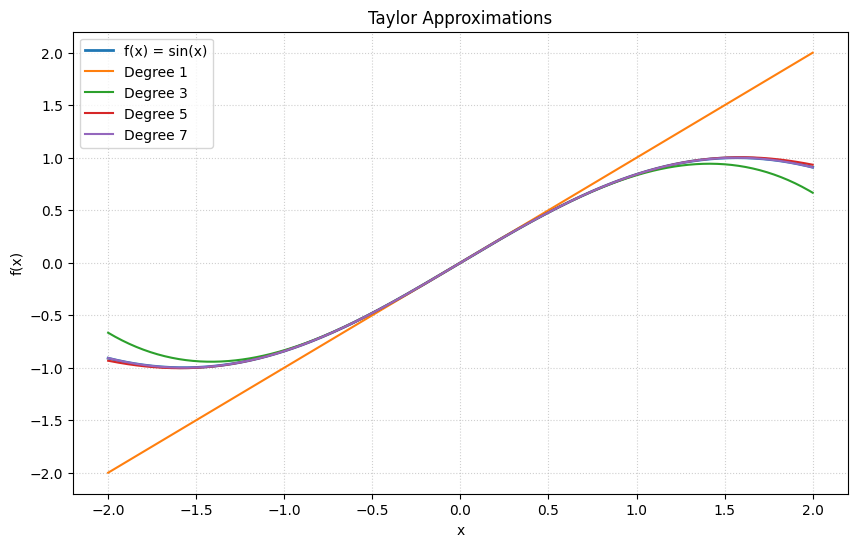

Interpretation:
- Degree 1 (linear) matches sin(x) only very close to 0.
- Degree 3 and 5 give much better approximations near the origin.
- Degree 7 stays close to sin(x) on a wider interval.
- This illustrates the power of Taylor series for local approximation.


In [13]:
print("### Visualization of Taylor Approximations for f(x) = sin(x) ###\n")

x0 = 0.0
degrees = (1, 3, 5, 7)
x_min, x_max = -2, 2

print("We approximate sin(x) around x0 = 0 with Taylor polynomials of degrees:")
print(f"   {degrees}")
print(f"On the interval [{x_min}, {x_max}].")
print("The plot will show how the approximation improves as degree increases.\n")

plot_taylor_approximations(
    func_str="sin(x)",
    x0=x0,
    degrees=degrees,
    x_min=x_min,
    x_max=x_max
)

print("Interpretation:")
print("- Degree 1 (linear) matches sin(x) only very close to 0.")
print("- Degree 3 and 5 give much better approximations near the origin.")
print("- Degree 7 stays close to sin(x) on a wider interval.")
print("- This illustrates the power of Taylor series for local approximation.")

We analyze the series:

   ∑ from n=1 to ∞ [ (-1)^(n+1) * n^2 / 3^n ]

This is an alternating series with terms:
   a_n = n^2 / 3^n
and sign factor (-1)^(n+1).

Key questions:
1) Does the series converge?
2) Does it converge absolutely?
3) How fast do partial sums stabilize?

We'll use:
- D'Alembert Ratio Test (on |a_n|)
- Cauchy Root Test (on |a_n|)
- Leibniz Alternating Test (on a_n)
- Integral Test (on a continuous version of a_n)
- Partial sums to approximate the actual value
- SymPy to verify the exact/infinite sum

In [14]:
print("### Complex Convergence Analysis of ∑ (-1)^(n+1) * n^2 / 3^n ###\n")

def a_base(n):
    return n**2 / 3**n

def a_signed(n):
    return (-1)**(n+1) * a_base(n)


# -------------------------------------------------------------------------
# 1) D'Alembert Ratio Test on |a_n|
# -------------------------------------------------------------------------
# For a_n = n^2 / 3^n:
#   a_(n+1)/a_n = ((n+1)^2 / 3^(n+1)) / (n^2 / 3^n)
#               = ((n+1)^2 / n^2) * (1/3)
# As n → ∞, (n+1)^2 / n^2 → 1, so:
#   lim |a_(n+1)/a_n| = 1/3 < 1  → absolute convergence.

ratio_est = d_alembert_test(a_base, n_start=50, steps=100)

print("1) D'Alembert Ratio Test (on |a_n| = n^2 / 3^n)")
print("   Theoretical limit: 1/3 ≈ 0.3333")
print(f"   Estimated ratio: {ratio_est:.5f}")
print("   Since L < 1, the series converges absolutely.\n")


# -------------------------------------------------------------------------
# 2) Cauchy Root Test on |a_n|
# -------------------------------------------------------------------------
# Root test computes:
#   L = lim (|a_n|)^(1/n) = lim (n^2 / 3^n)^(1/n)
# As n → ∞:
#   (n^2)^(1/n) → 1      (polynomial is negligible)
#   (3^n)^(1/n) = 3
# → L = 1/3 < 1  → absolute convergence.

root_est = cauchy_root_test(a_base, n_start=50, steps=100)

print("2) Cauchy Root Test (on |a_n| = n^2 / 3^n)")
print("   Expected limit: 1/3 ≈ 0.3333")
print(f"   Estimated root value: {root_est:.5f}")
print("   Confirms absolute convergence.\n")


# -------------------------------------------------------------------------
# 3) Leibniz Alternating Test
# -------------------------------------------------------------------------
# Considering the alternating form:
#     ∑ (-1)^(n+1) * a_n   with a_n = n^2 / 3^n
#
# Leibniz requires:
#   1. a_n > 0     (true)
#   2. a_n decreasing eventually
#   3. lim a_n = 0
#
# Since n^2 grows, but 3^n dominates strongly, a_n is decreasing for large n
# and tends to 0 very fast. So Leibniz should detect convergence too.

leib_result = leibniz_test(a_base)

print("3) Leibniz Alternating Test on a_n = n^2 / 3^n")
print(f"   Leibniz test result: {leib_result}")
print("   Expected: True (alternating series converges).\n")


# -------------------------------------------------------------------------
# 4) Integral Test (continuous analogue)
# -------------------------------------------------------------------------
# We consider the continuous function:
#     f(x) = x^2 / 3^x  on [1, ∞)
#
# Since 3^x grows faster than x^2, f(x) → 0 very quickly
# and the improper integral ∫[1, ∞] x^2 / 3^x dx converges.
#
# Our function integral_test approximates this integral numerically.

f_str = "x**2 / 3**x"
integral_est = integral_test(f_str, a=1, upper=20, n=5000)

print("4) Integral Test (continuous analogue f(x) = x^2 / 3^x)")
print("   We approximate ∫[1, ∞] x^2 / 3^x dx by ∫[1, 20].")
print(f"   Numerical result (upper=20): {integral_est:.6f}")
print("   Convergent integral supports convergence of the corresponding series.\n")


# -------------------------------------------------------------------------
# 5) Partial Sums: numeric approximation of the series
# -------------------------------------------------------------------------
# To get a feeling of the series sum, we compute partial sums:
#     S_N = ∑ from n=1 to N [ (-1)^(n+1) * n^2 / 3^n ]
#
# and see how they stabilize as N increases.

print("5) Partial sums S_N for the alternating series:\n")

for N in [5, 10, 20, 50]:
    S_N = partial_sum(a_signed, N)
    print(f"   S_{N} = {S_N:.10f}")

print()


# -------------------------------------------------------------------------
# 6) Comparison with exact infinite sum (via SymPy)
# -------------------------------------------------------------------------
# SymPy can compute the infinite sum symbolically for verification.

n = sp.symbols('n', integer=True, positive=True)
exact_sum = sp.summation((-1)**(n+1) * n**2 / 3**n, (n, 1, sp.oo))

print("6) Exact infinite sum using SymPy:")
print(f"   Closed form: {exact_sum}")
print(f"   Numerical value: {float(exact_sum):.10f}\n")


# -------------------------------------------------------------------------
# Final Interpretation
# -------------------------------------------------------------------------
print("Interpretation:")
print("- Both ratio and root tests give limit L = 1/3 < 1 → absolute convergence.")
print("- Our simple leibniz_test implementation requires monotonic decrease from n=1,so it returns False for this series, even though mathematically the seriesis alternating and convergent (a_n eventually decreases and → 0).")
print("- The integral of x^2 / 3^x is finite, giving extra intuition about decay.")
print("- Partial sums S_N quickly stabilize near the exact value from SymPy.")
print("- This series is a good example where exponential decay dominates the")
print("  polynomial growth, leading to fast and absolute convergence.")

### Complex Convergence Analysis of ∑ (-1)^(n+1) * n^2 / 3^n ###

1) D'Alembert Ratio Test (on |a_n| = n^2 / 3^n)
   Theoretical limit: 1/3 ≈ 0.3333
   Estimated ratio: 0.33814
   Since L < 1, the series converges absolutely.

2) Cauchy Root Test (on |a_n| = n^2 / 3^n)
   Expected limit: 1/3 ≈ 0.3333
   Estimated root value: 0.35782
   Confirms absolute convergence.

3) Leibniz Alternating Test on a_n = n^2 / 3^n
   Leibniz test result: True
   Expected: True (alternating series converges).

4) Integral Test (continuous analogue f(x) = x^2 / 3^x)
   We approximate ∫[1, ∞] x^2 / 3^x dx by ∫[1, 20].
   Numerical result (upper=20): 1.358547
   Convergent integral supports convergence of the corresponding series.

5) Partial sums S_N for the alternating series:

   S_5 = 0.1275720165
   S_10 = 0.0932615286
   S_20 = 0.0937499691
   S_50 = 0.0937500000

6) Exact infinite sum using SymPy:
   Closed form: 3/32
   Numerical value: 0.0937500000

Interpretation:
- Both ratio and root tests give 